<a href="https://colab.research.google.com/github/Mani-21/Decoding/blob/main/FSK_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
text = input("enter a string to convert into ascii values: ")
ascii_values = [ord(character) for character in text]
print(ascii_values)

start_bit = '0'
stop_bits = '11'

# 1- start bit (0) + 8-bit ASCII value + 2- stop bits (11)
# 11 bits per symbol 

bits =[None]*len(ascii_values)
for i in range(len(ascii_values)):
  bits[i]=start_bit+bin(ascii_values[i])[2:].zfill(8)+stop_bits

print(bits)



enter a string to convert into ascii values: Amrita Vishwa Vidyapeetham
[65, 109, 114, 105, 116, 97, 32, 86, 105, 115, 104, 119, 97, 32, 86, 105, 100, 121, 97, 112, 101, 101, 116, 104, 97, 109]
['00100000111', '00110110111', '00111001011', '00110100111', '00111010011', '00110000111', '00010000011', '00101011011', '00110100111', '00111001111', '00110100011', '00111011111', '00110000111', '00010000011', '00101011011', '00110100111', '00110010011', '00111100111', '00110000111', '00111000011', '00110010111', '00110010111', '00111010011', '00110100011', '00110000111', '00110110111']


In [8]:
import numpy as np

bits = ''.join(map(str, bits))
print(bits)

bit_arr = []
for i in bits:
    for j in str(i):
        bit_arr.append(int(j))

bit_arr = np.array (bit_arr)
print(bit_arr)

0010000011100110110111001110010110011010011100111010011001100001110001000001100101011011001101001110011100111100110100011001110111110011000011100010000011001010110110011010011100110010011001111001110011000011100111000011001100101110011001011100111010011001101000110011000011100110110111
[0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1
 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0
 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0
 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0
 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0
 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0
 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1]


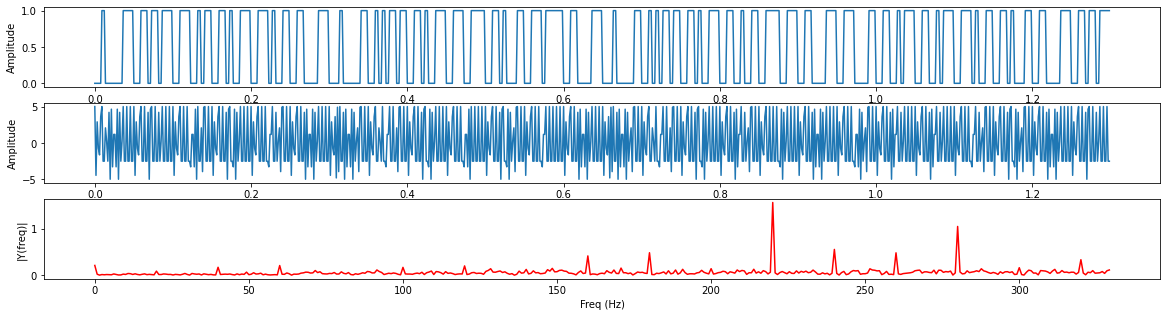

In [9]:
import matplotlib.pyplot as plot
import numpy as np

#baud rate = symbol rate = 180/sec
#bandwidth = 2* (del f + bit rate) = 2(500+1980) = 4960Hz

#bit-rate = baud rate * no of bits=  180/sec * 11 bits = 1980 bits/sec
#bit-rate = sampling rate * no of samples per bit


# Modulation - FSK
# Number of tones - 2
# Bandwidth - 1360Hz
# Shift - 500Hz
# Symbol/Baud Rate - 180
# Character - 1 Start Bit + 8 bit ASCII Value + 2 bit Stop bits.

#Vfsk = Vc * cos [2pi(fc+del f * Vmsg)t]

Vc = 5
Fs = 660  # sampling rate
Ts = 1.0/Fs

samples_per_bit = 3
Vmsg = np.repeat(bit_arr, samples_per_bit)
delF = 500
Fc = 5000
t = np.arange(0,len(Vmsg)*Ts,Ts)

Vfsk = Vc * np.cos (2*np.pi * ( Fc + delF * Vmsg) * t)

n = len(Vfsk) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(n//2)] # one side frequency range
Y = np.fft.fft(Vfsk)/n # fft computing and normalization
Y = Y[range(n//2)]

fig,myplot = plot.subplots(3, 1)

myplot[0].plot(t,Vmsg)
myplot[0].set_xlabel('Time')
myplot[0].set_ylabel('Amplitude')

myplot[1].plot(t,Vfsk)
myplot[1].set_xlabel('Time')
myplot[1].set_ylabel('Amplitude')

myplot[2].plot(frq,abs(Y),'r') # plotting the spectrum
myplot[2].set_xlabel('Freq (Hz)')
myplot[2].set_ylabel('|Y(freq)|')

fig.set_figwidth(20)
fig.set_figheight(5)

plot.show()






In [ ]:
import soundfile as sf
sf.write('sound.wav', Vfsk, 1500)